# CINIC10 Data exploration

In [1]:
import os
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as f

_ = torch.manual_seed(42)

device = "cuda:0" if torch.cuda.is_available() else "cpu"

## Loading the dataset
To explore the dataset, we should divide the dataset into 3 subsets:
- train,
- validation and
- test.

In this case dataset is already split by the authors.

*WARNING!* 

CINIC10 is a combination of ImageNet and CIFAR and because of that any firther splitting 
into subsets should keep the proportions of samples from datasets.

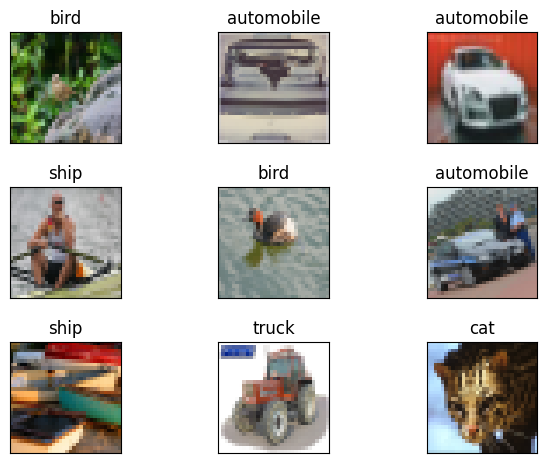

In [2]:
DATA_PATH = os.path.join(os.getcwd(), "..", "data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")

ds_train = torchvision.datasets.ImageFolder(TRAIN_PATH, transform=transforms.ToTensor())
cinic_train = torch.utils.data.DataLoader(dataset=ds_train, batch_size=9, shuffle=True)

sample = next(iter(cinic_train))
fig, axs = plt.subplots(3, 3)
fig.tight_layout()
for i in range(9):
    axs[i//3, i%3].imshow(f.to_pil_image(sample[0][i]))
    axs[i//3, i%3].set_title(f"{ds_train.classes[sample[1][i].item()]}")
    axs[i//3, i%3].set_xticks([])
    axs[i//3, i%3].set_yticks([])

## Class balancing

According to the supplied README file, classes are perfectly balanced - 9000 samples per class per subset.

In [3]:
labels = os.listdir(TRAIN_PATH)
longest_label = max([len(label) for label in labels])
class_counts = [len(os.listdir(os.path.join(TRAIN_PATH, label))) for label in labels]

print("Cardinalities of classes: ", class_counts)

Cardinalities of classes:  [9000, 9000, 9000, 9000, 9000, 9000, 9000, 9000, 9000, 9000]


## Dataset balancing

Since CINIC10 is a merge of two datasets, samples in each class come from different distributions. 

It is guaranteed by the authors that the ratio of samples from different datasets is equal in all classes - 
2000 CIFAR10 images and 7000 ImageNet images per class per subset.

In [4]:
labels = os.listdir(TRAIN_PATH)
longest_label = max([len(label) for label in labels])
for label in labels:
    images = (os.listdir(os.path.join(TRAIN_PATH, label)))
    cifar_images = sum([1 if image.startswith("cifar") else 0 for image in images])
    padding = " "*(longest_label - len(label))
    print(f"{label + padding}:\tCifar images = {cifar_images},\tImageNet images = {len(images) - cifar_images}")

airplane  :	Cifar images = 2000,	ImageNet images = 7000
automobile:	Cifar images = 2000,	ImageNet images = 7000
bird      :	Cifar images = 2000,	ImageNet images = 7000
cat       :	Cifar images = 2000,	ImageNet images = 7000
deer      :	Cifar images = 2000,	ImageNet images = 7000
dog       :	Cifar images = 2000,	ImageNet images = 7000
frog      :	Cifar images = 2000,	ImageNet images = 7000
horse     :	Cifar images = 2000,	ImageNet images = 7000
ship      :	Cifar images = 2000,	ImageNet images = 7000
truck     :	Cifar images = 2000,	ImageNet images = 7000


## Input normalization

Means and standard deviations for channel normalization are provided by the authors.

In [5]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]